In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def returnPoint(self):
        return (self.x, self.y)        

In [7]:
class Node:
    def __init__(self, item):
        self.item = item
        self.pred = None
        self.succ = None

In [8]:
class DoublyLinkedList:
    def __init__(self):
        self.start_node = None
        self.end_node = None
                
    def insert(self, data):
        if self.start_node is None:
            new_node = Node(data)
            self.start_node = new_node
            self.end_node = new_node
            
            self.end_node.pred = self.start_node
            self.start_node.succ = self.end_node
            
            self.end_node.succ = self.start_node
            self.start_node.pred = self.end_node
            return
        
        new_node = Node(data)
        new_node.pred = self.end_node
        self.end_node.succ = new_node
        self.end_node = new_node
        self.end_node.succ = self.start_node
        self.start_node.pred = self.end_node
    
    def getNode(self, data):
        if self.start_node is None:
            print("List is empty")
            return
        else:
            n = self.start_node
            while n is not None:
                if(n.item == data):
                    return n
                n = n.succ
            print("Item not found")

    def deleteElement(self, x):
        if self.start_node is None:
            print("List is empty")
            return 
        if self.start_node.succ is None:
            if self.start_node.item == x:
                self.start_node = None
            else:
                print("Item not found")
            return 

        if self.start_node.item == x:
            self.start_node = self.start_node.succ
            self.start_node.pred = self.end_node
            self.end_node.succ = self.start_node
            return
        
        if self.end_node.item == x:
            self.end_node = self.end_node.pred
            self.start_node.pred = self.end_node
            self.end_node.succ = self.start_node
            return

        n = self.start_node
        while n.succ is not None:
            if n.item == x:
                break;
            n = n.succ
        if n.succ is not None:
            n.pred.succ = n.succ
            n.succ.pred = n.pred
        else:
            if n.item == x:
                n.pred.succ = None
            else:
                print("Element not found")
                
    def returnList(self):
        rtList = []
        if self.start_node is None:
            print("List is empty")
            return
        else:
            n = self.start_node
            rtList.append(n.item)
            n = n.succ
            while n is not self.start_node:
                rtList.append(n.item)
                n = n.succ
        return rtList

In [9]:
import math
def create_points_circle(r, n):
    pi = math.pi
    points = []
    for i in range(n):
        x = math.cos(2*pi*(np.random.rand()*max)/n*i)*r *(np.random.rand())
        y = math.sin(2*pi*(np.random.rand()*max)/n*i)*r *(np.random.rand())
        p = Point(x, y)
        points.append(p)
    return points

In [10]:
def plotPoints(points, Y0, showAngles=False, hull=None):
    n = len(points)
    if(showAngles == True):
        point1 = [Y0.x, Y0.y]
        for i in range(n):
            point2 = [points[i].x,points[i].y]
            x_values = [point1[0], point2[0]]
            y_values = [point1[1], point2[1]]
            plt.plot(x_values, y_values, 'b-', linewidth=0.1)
            plt.plot(point2[0], point2[1], 'b.')
    
    if hull:
        x0 = hull[0].x
        y0 = hull[0].y
        
        for p in hull[1:]:
            x1 = p.x
            y1 = p.y
            plt.plot([x0, x1], [y0, y1])
            x0, y0 = x1, y1
        
    
    for i in range(n):
        plt.plot(points[i].x, points[i].y, "b.")
    plt.plot(Y0.x, Y0.y, "go")
    plt.show()

In [11]:
def getOrientation(p0, p1, p2):
    
    Dx1 = p1.x - p0.x
    Dx2 = p2.x - p0.x
    Dy1 = p1.y - p0.y
    Dy2 = p2.y - p0.y
    
    result = (Dx1 * Dy2) - (Dy1 * Dx2)
    return result

In [12]:
def GrahamScan(points):
    n = len(points)
    Y0 = Point(max, max)
    Y0_Ind = 0
    for i in range(n):
        if(points[i].y < Y0.y):
            Y0 = points[i]
            Y0_Ind = i
            
    angles = []    
    for i in range(n):  #calculate all angles and store in a list
        Vec = (points[i].x - Y0.x, points[i].y - Y0.y)
        if(Vec != (0, 0)):
            angle = math.atan2(points[i].y - Y0.y, points[i].x - Y0.x)
        else:
            angle = 0
        angles.append(angle)
    
    result = [x for _, x in sorted(zip(angles, points))]  #sort points according to their angle
    
    dll = DoublyLinkedList()
    for i in range(n):
        dll.insert(result[i])
            
    Y0Node = dll.getNode(Y0)
    v = Y0Node
    
    while(v.succ != Y0Node):
        if(getOrientation(v.item, v.succ.item, v.succ.succ.item) >= 0):
            v = v.succ
        else:
            dll.deleteElement(v.succ.item)
            v = v.pred
    resultList = dll.returnList()
    resultList.append(Y0)
    
    return Y0, resultList
    

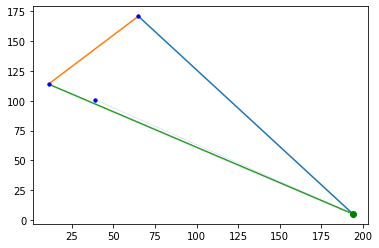

In [13]:
max = 10
#points = create_points_circle(max,200)
points = []
p1 = Point(65,171)
p2 = Point(11,114)
p3 = Point(39,101)
p4 = Point(194,5)
points.append(p1)
points.append(p2)
points.append(p3)
points.append(p4)
Y0, resultList = GrahamScan(points)
plotPoints(points, Y0, showAngles=True, hull=resultList)